In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score, mean_squared_error, f1_score, r2_score

In [3]:
#load dataset
uber_dataset = pd.read_csv("uber.csv")
uber_dataset.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
#check for missing values
uber_dataset.isnull().sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
#handle missing values
uber_dataset = uber_dataset.dropna()


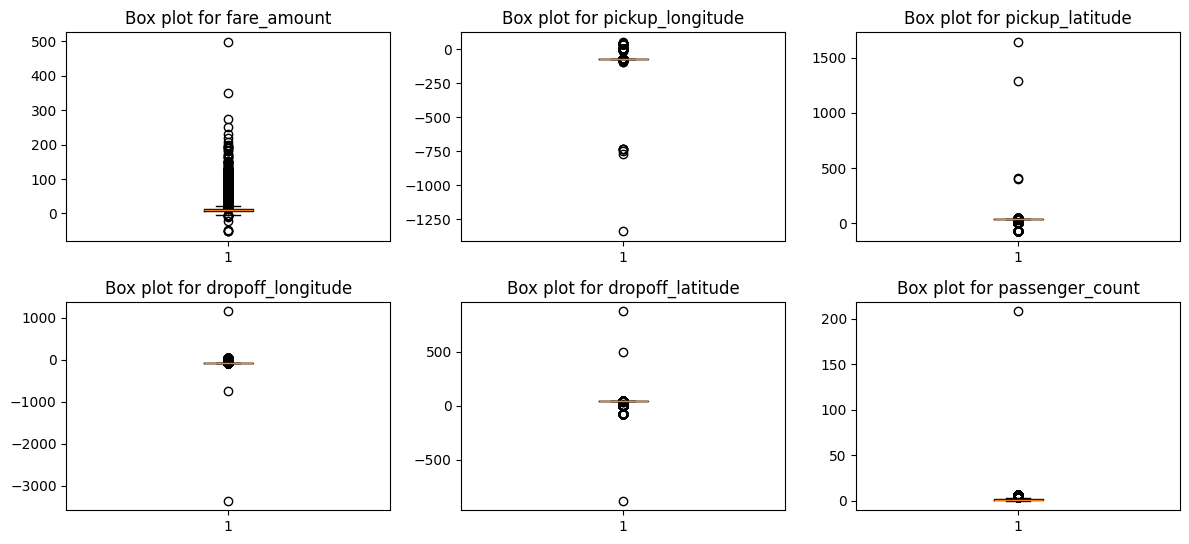

In [6]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.boxplot(uber_dataset['fare_amount'])
plt.title('Box plot for fare_amount')

plt.subplot(3, 3, 2)
plt.boxplot(uber_dataset['pickup_longitude'])
plt.title('Box plot for pickup_longitude')

plt.subplot(3, 3, 3)
plt.boxplot(uber_dataset['pickup_latitude'])
plt.title('Box plot for pickup_latitude')

plt.subplot(3, 3, 4)
plt.boxplot(uber_dataset['dropoff_longitude'])
plt.title('Box plot for dropoff_longitude')

plt.subplot(3, 3, 5)
plt.boxplot(uber_dataset['dropoff_latitude'])
plt.title('Box plot for dropoff_latitude')

plt.subplot(3, 3, 6)
plt.boxplot(uber_dataset['passenger_count'])
plt.title('Box plot for passenger_count')

plt.tight_layout()
plt.show()


In [8]:
numeric_variables = ['fare_amount', 'passenger_count', 'pickup_longitude', 'pickup_latitude' ,'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
for var in numeric_variables:
    Q1 = uber_dataset[var].quantile(0.25)
    Q3 = uber_dataset[var].quantile(0.75)
    IQR = (Q3-Q1)
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    uber_dataset = uber_dataset[(uber_dataset[var] >= lower_bound) & (uber_dataset[var] <= upper_bound)]

# Check the dataset after handling outliers
uber_dataset

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
...,...,...,...,...,...,...,...,...,...
199993,28359558,2012-09-29 19:51:27.0000006,9.5,2012-09-29 19:51:27 UTC,-73.987798,40.721210,-73.980960,40.744388,1
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1


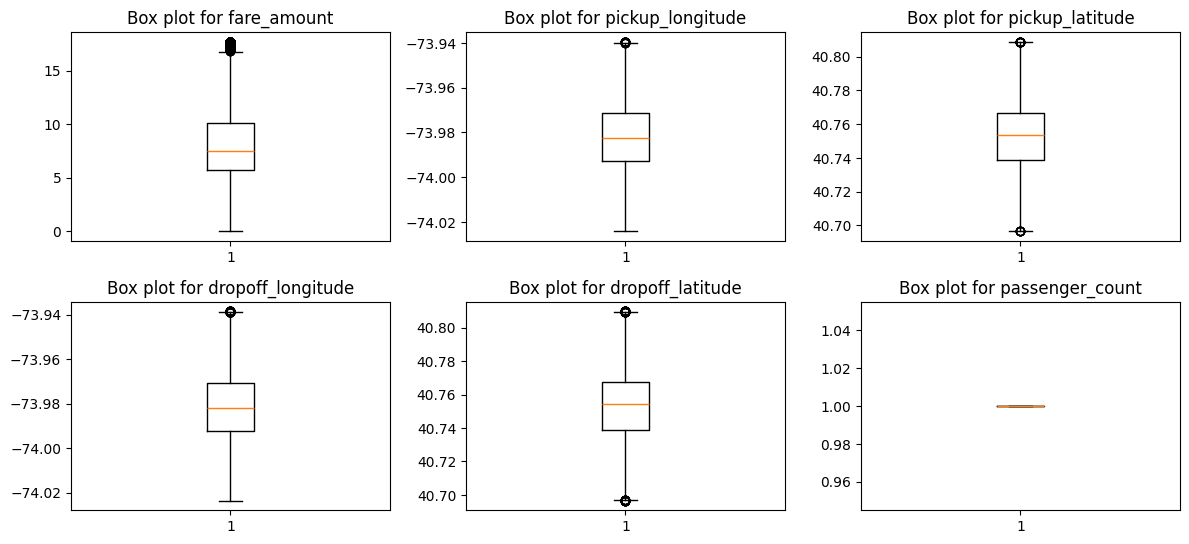

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.boxplot(uber_dataset['fare_amount'])
plt.title('Box plot for fare_amount')

plt.subplot(3, 3, 2)
plt.boxplot(uber_dataset['pickup_longitude'])
plt.title('Box plot for pickup_longitude')

plt.subplot(3, 3, 3)
plt.boxplot(uber_dataset['pickup_latitude'])
plt.title('Box plot for pickup_latitude')

plt.subplot(3, 3, 4)
plt.boxplot(uber_dataset['dropoff_longitude'])
plt.title('Box plot for dropoff_longitude')

plt.subplot(3, 3, 5)
plt.boxplot(uber_dataset['dropoff_latitude'])
plt.title('Box plot for dropoff_latitude')

plt.subplot(3, 3, 6)
plt.boxplot(uber_dataset['passenger_count'])
plt.title('Box plot for passenger_count')

plt.tight_layout()
plt.show()

<Axes: >

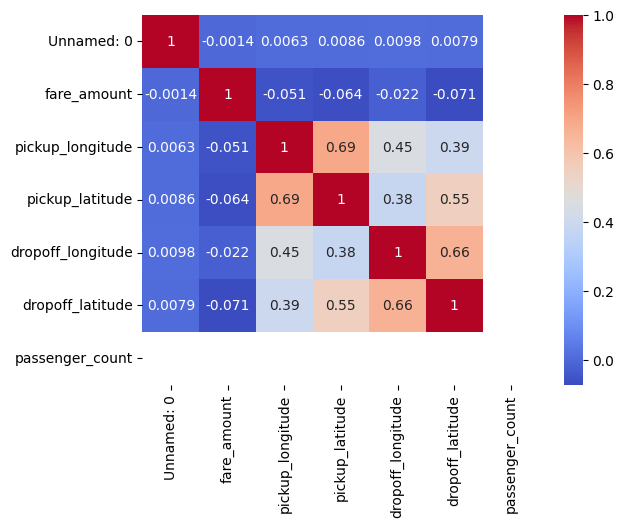

In [10]:
# creation of correlation matrix
corrM = uber_dataset.drop(["key", "pickup_datetime"], axis='columns').corr()
sns.heatmap(corrM, annot=True, cmap='coolwarm')

In [13]:
#Split the data into independent features (X) and dependent feature (Y)
X = uber_dataset.drop(["key", "pickup_datetime", "fare_amount"], axis=1)
Y = uber_dataset["fare_amount"]

#Create training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression Model
LiRmodel = LinearRegression()
LiRmodel.fit(X_train_scaled, Y_train)

#Ridge
Rmodel = Ridge(solver = 'lsqr', random_state = 10)
Rmodel.fit(X_train_scaled, Y_train)

#Lasso Regression Model
LaRmodel = Lasso(random_state = 9)
LaRmodel.fit(X_train_scaled, Y_train)


Lasso(random_state=9)

In [14]:
LiRmodel_pred = LiRmodel.predict(X_test_scaled)
Rmodel_pred = Rmodel.predict(X_test_scaled)
LaRmodel_pred = LaRmodel.predict(X_test_scaled)

# Evaluation of Linear Regression Model
mse = mean_squared_error(Y_test, LiRmodel_pred)
r2 = r2_score(Y_test, LiRmodel_pred)
print(f"Mean squared error of the baseline model: {mse}")
print(f"R2 Score of the baseline model: {r2}")
results_df = pd.DataFrame({
'Actual': Y_test,
'Predicted': LiRmodel_pred
})

Mean squared error of the baseline model: 10.970860994837496
R2 Score of the baseline model: 0.007177644856035892


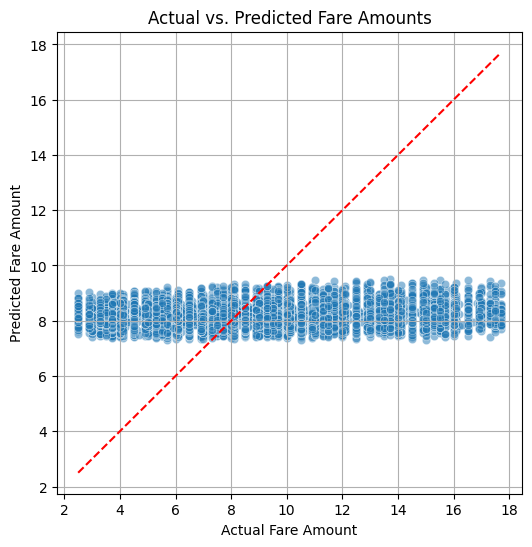

In [15]:
# Plotting
plt.figure(figsize=(6, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.5)

# Add a line of equality (where Actual = Predicted)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
[results_df['Actual'].min(), results_df['Actual'].max()],
color='red', linestyle='--')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs. Predicted Fare Amounts')
plt.grid(True)
plt.show()

In [16]:
# Evaluation of Ridge Model
mse = mean_squared_error(Y_test, Rmodel_pred)
r2 = r2_score(Y_test, Rmodel_pred)
print(f"Mean squared error of the baseline model: {mse}")
print(f"R2 Score of the baseline model: {r2}")


Mean squared error of the baseline model: 10.970860874353466
R2 Score of the baseline model: 0.007177655759395107


In [17]:
# Create a DataFrame for visualization
results_df = pd.DataFrame({
'Actual': Y_test,
'Rmodel_Predicted': Rmodel_pred,
'LaRmodel_Predicted': LaRmodel_pred
})

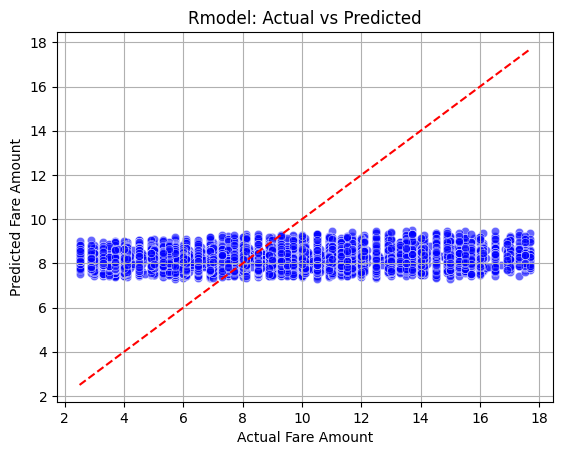

In [18]:
# Plot for Rmodel predictions
sns.scatterplot(x='Actual', y='Rmodel_Predicted', data=results_df, alpha=0.6, color='blue')
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
[results_df['Actual'].min(), results_df['Actual'].max()],
color='red', linestyle='--')
plt.title('Rmodel: Actual vs Predicted')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.grid(True)
plt.show()

In [19]:
# Evaluation of Lasso Regression Model
mse = mean_squared_error(Y_test, LaRmodel_pred)
r2 = r2_score(Y_test, LaRmodel_pred)
print(f"Mean squared error of the baseline model: {mse}")
print(f"R2 Score of the baseline model: {r2}")

Mean squared error of the baseline model: 11.050615783552622
R2 Score of the baseline model: -3.98686284046601e-05


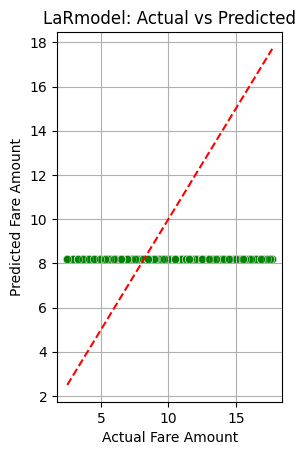

In [20]:
# Plot for LaRmodel predictions
plt.subplot(1, 2, 2)
sns.scatterplot(x='Actual', y='LaRmodel_Predicted', data=results_df, alpha=0.6, color='green')
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
[results_df['Actual'].min(), results_df['Actual'].max()],
color='red', linestyle='--')
plt.title('LaRmodel: Actual vs Predicted')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.grid(True)
plt.show()